<a href="https://colab.research.google.com/github/mimikuo365/Bike-Rider-Facilitating-System/blob/master/%5B202203_Week4%5D_Medelli%CC%81n_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Functions

In [ ]:
import pandas as pd
from skimage import io
import tifffile
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:
!pip install import-ipynb
import import_ipynb
%cd '/content/drive/MyDrive/Dengue forecasting with Satellite Images/code/'
import utils

/content/drive/MyDrive/Dengue forecasting with Satellite Images/code


## Setup

In [ ]:
selected_band = 10
dataset_main_folder = '/content/drive/MyDrive/Dengue forecasting with Satellite Images/dataset'
filepath = os.path.join(dataset_main_folder, 'csv/Medellín with classes_path updated_band' + str(selected_band) + '.csv')
print(filepath)
data_dic = utils.load_csv_to_dict(filepath)
print(data_dic.keys())

/content/drive/MyDrive/Dengue forecasting with Satellite Images/dataset/csv/Medellín with classes_path updated_band10.csv
dict_keys(['epiweek', 'image', 'cases', 'class'])


In [ ]:
setting = {
    'perform_smooth': False,
    'smoothing_length': 5,
    'run_all_img_and_save_result': False,
    'tile_swap_result_folder': os.path.join(dataset_main_folder, 'analysis/5_cities/Medellín/swapped_equalized_band' + str(selected_band)),
    'height_split': 16, # numbers of split for height
    'width_split': 16, # numbers of split for width
    'height_group': 1,
    'width_group': 1,
    'train_val_ratio': 0.8, # train-test ratio
    'lstm_weeks': 10 # LSTM window
}

utils.check_folder(setting['tile_swap_result_folder'])


201622
201623
201707
201718
201729
201735
201736
201751
201815
(745, 747)


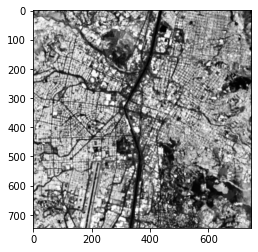

In [ ]:
case_ls = data_dic['cases']
case_ls = utils.smooth_cases(setting, case_ls)

train_num = int(len(case_ls) * setting['train_val_ratio']) + setting['lstm_weeks']
save_path = setting['tile_swap_result_folder'] + '/average_img_from_traing.png'
avg_img = utils.get_avg_img(data_dic, train_num, save_path)

(256,)
(156, 256)
(256,)
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201613
201614
201615
201616
201617
201618
201619
201620
201621
201622
201623
201624
201625
201626
201627
201628
201629
201630
201631
201632
201633
201634
201635
201636
201637
201638
201639
201640
201641
201642
201643
201644
201645
201646
201647
201648
201649
201650
201651
201652
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201713
201714
201715
201716
201717
201718
201719
201720
201721
201722
201723
201724
201725
201726
201727
201728
201729
201730
201731
201732
201733
201734
201735
201736
201737
201738
201739
201740
201741
201742
201743
201744
201745
201746
201747
201748
201749
201750
201751
201752
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201813
201814
201815
201816
201817
201818
201819
201820
201821
201822
201823
201824
201825
201826
201827
201828
201829
201830
201831
201832
201833
201834
201835
20

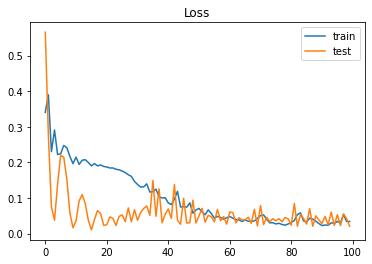

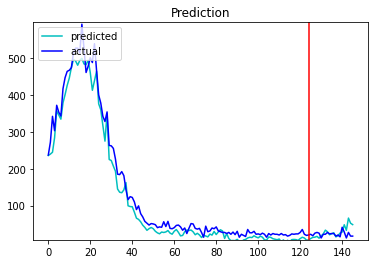

[ 6.68251  10.396371 13.512833 14.136186 16.29302  11.465473 17.538366
 23.068981 33.189697 28.740227 20.661486 23.549862 26.193062 14.888304
 17.925566 25.337753 27.995481 47.877586 32.773933 65.950294 52.043625
 48.224472]
[20. 22. 18. 25. 27. 25. 12. 22. 22. 27. 23. 24. 24. 17. 20. 15. 41. 28.
 12. 27. 17. 17.]
MAE: 11.93
Correlation: 0.09


In [ ]:
setting['tile_height'], setting['tile_width'] = utils.get_pixels_per_tile(avg_img, setting['height_split'], setting['width_split'])
setting['row_col_pairs'] = utils.get_row_col_pair(avg_img, setting)

avg_img_tiles = utils.split_img_to_tiles(avg_img, setting)
print(avg_img_tiles.shape)

tile_ls = utils.run_tile_transformation_on_all(data_dic, setting)
print(tile_ls.shape)

# Calculate the standard deviation for each tile
tile_std = np.std(tile_ls, axis=0)
print(tile_std.shape)

preprocessed_tile_ls = utils.tile_swapping_and_grouping(tile_ls, data_dic, tile_std, avg_img_tiles, setting)

final_X_train, final_X_test, final_y_train, final_y_test, scaler = utils.prepare_XY_for_lstm(preprocessed_tile_ls, case_ls, setting)
utils.eval_model(final_X_train, final_X_test, final_y_train, final_y_test, scaler)

In [ ]:
print(data_dic.keys())

In [ ]:
counter = 0
for i in range(len(data_dic['class'])):
  real = data_dic['class'][i]
  pred = data_dic['predicted_class'][i]

  if ((real == 'bad' and pred == 'good') or (real == 'good' and pred == 'bad')): # None
  # if (real != pred): # 65
    print('Wrong prediction!') 
    print(data_dic['epiweek'][i], data_dic['swap ratio'][i], real, pred)
    counter += 1
print(counter)